## Project Overview
This project aims to predict whether individuals in the tech industry are likely to experience mental health issues based on various demographic, workplace, and health-related factors.
### Goal:
The project will employ machine learning techniques to identify those who may be at risk of poor mental health, potentially providing insights that can help organizations improve their mental health support systems.
### Dataset Sourcing:
Kaggle[This dataset provides valuable insights into the prevalence of mental health issues among individuals in the tech industry, through survey responses from people living all over the world]

### Columns Overview
| Field                     | Description                                                             | Variable Type |
|----------------------------|-------------------------------------------------------------------------|---------------|
| Timestamp                  | Date and time of survey submission.                                     | N/A           |
| Age                        | Age of the respondent.                                                  | Numerical     |
| Gender                     | Gender of the respondent.                                               | Categorical   |
| Country                    | Country of residence of the respondent.                                 | Categorical   |
| State                      | US state of residence of the respondent.                                | Categorical   |
| Self Employed               | Whether the respondent is self-employed.                               | Categorical   |
| Family History             | Whether the respondent has a family history of mental health issues.     | Categorical   |
| Treatment                  | Whether the respondent has sought treatment for a mental health issue.  | Categorical   |
| Work Interfere             | How much work is interfered with due to mental health issues.            | Categorical   |
| No Employees               | Number of employees at the respondent's workplace.                      | Numerical     |
| Remote Work                | Whether the respondent works remotely.                                  | Categorical   |
| Tech Company               | Whether the respondent works in a tech company.                         | Categorical   |
| Benefits                   | Whether the respondent's workplace offers mental health benefits.       | Categorical   |
| Care Options               | Whether the respondent's workplace offers mental health care options.   | Categorical   |
| Wellness Program           | Whether the respondent's workplace offers a wellness program.           | Categorical   |
| Seek Help                  | Whether the respondent has sought help for a mental health issue.       | Categorical   |
| Anonymity                  | Whether the respondent's workplace allows for anonymity when seeking help for a mental health issue. | Categorical   |
| Leave                      | Whether the respondent's workplace offers leave for mental health issues.| Categorical   |
| Mental Health Consequence   | Whether the respondent has experienced negative consequences due to discussing mental health issues at work. | Categorical   |
| Phys Health Consequence     | Whether the respondent has experienced negative consequences due to discussing physical health issues at work. | Categorical   |
| Coworkers                  | Whether the respondent has discussed mental health issues with coworkers.| Categorical   |
| Supervisor                 | Whether the respondent has discussed mental health issues with their supervisor. | Categorical   |


### Data gathering and exploration

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [6]:
#load the dataset
df = pd.read_csv("mental tech survey.csv")

In [8]:
#make a copy of the dataset
data = df.copy()

###### Note: I will be working with the copy of the dataset

### Data Cleaning

In [12]:
#inspect the copy of the dataset
data.head()


,index,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [14]:
#total number of rows and columns
data.shape

(1259, 28)

In [16]:
#data type for each columns
data.dtypes

index                         int64
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                    

In [18]:
# Checking for null values
data.isna().sum()

index                           0
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [20]:
# num_col=data.select_dtypes('number').columns

In [22]:
# num_col

Note: Some columns will be removed as they will not be relevant in preprocessing of the data

In [25]:
# Columns to be dropped
# step 1:assigning a variable to the columns that needs to be dropped
dropped_columns=["index", "Timestamp", "Country", "state", "comments"]

In [27]:
#step 2: dropping the columns
data.drop(columns=dropped_columns, inplace=True)

In [29]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [31]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [33]:
# Define a function to categorize gender simply
def categorize_gender_simple(gender):
    # Convert to lowercase for easier matching
    gender = gender.strip().lower()  # Remove extra spaces and make case insensitive
    
    # Map values associated with 'Male'
    if gender in ['male', 'm', 'male ', 'cis male', 'man', 'msle', 'mal', 'guy', 
                  'male leaning androgynous', 'ostensibly male']:
        return 'Male'
    
    # Map values associated with 'Female'
    elif gender in ['female', 'f', 'female ', 'cis female', 'woman', 'trans female', 
                    'female (cis)', 'femake']:
        return 'Female'
    
    # Return 'Other' for any unrecognized values or non-binary terms
    else:
        return 'Other'

# Assuming your DataFrame is named data and 'Gender' is the column you want to modify
data['Gender'] = data['Gender'].apply(categorize_gender_simple)

# Display unique values to verify the changes
print(data['Gender'].unique())

['Female' 'Male' 'Other']


In [35]:
# cat_col=data.select_dtypes('object').columns
# cat_col

In [37]:
# for col in cat_col[1:]:
#     print(col)
#     print(data[col].value_counts())

<Axes: xlabel='remote_work', ylabel='count'>

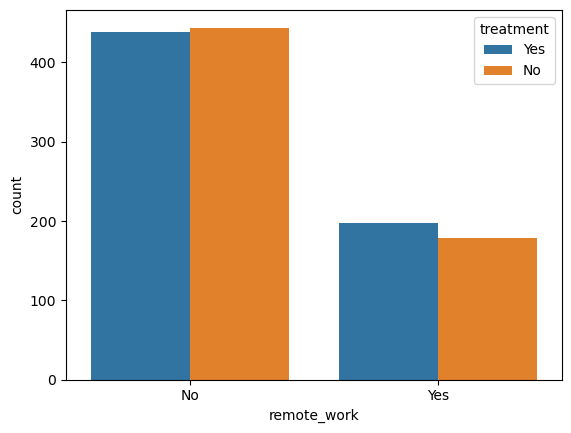

In [39]:
sns.countplot(data=data, x='remote_work',hue='treatment')

### Interpretation:
The analysis below shows that 
- Among individuals who do not work remotely ("No"), the count of those who received treatment is higher than those who did not receive treatment.
- For individuals who work remotely ("Yes"), the same pattern holds, though the total count is lower than for non-remote workers. However, more remote workers received treatment than those who did not.


<Axes: xlabel='Gender', ylabel='count'>

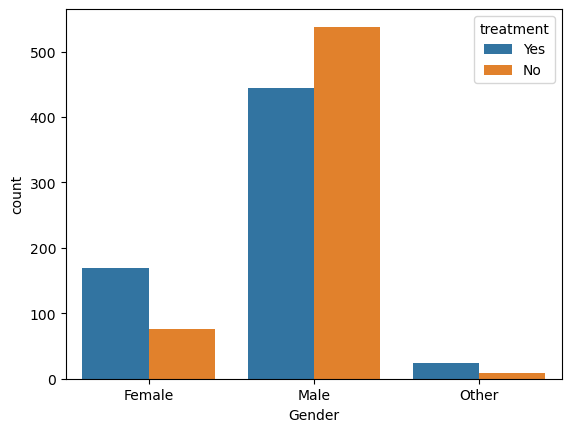

In [42]:
sns.countplot(data=data, x='Gender',hue='treatment') 

In [44]:
data["Gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

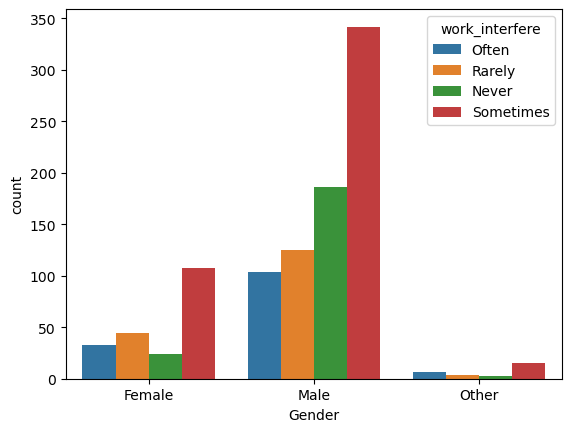

In [46]:
sns.countplot(data=data, x='Gender',hue='work_interfere')

In [48]:
# This function fills the the missing values with mean, or mode according to data types respectively
def fill_missing_values(col):
    if col.dtype == np.dtype(int):
        return col.fillna(col.median())
    elif col.dtype == np.dtype(float):
        return col.fillna(col.median())
    elif col.dtype == np.dtype("O"):
        return col.fillna(col.mode()[0])
    else:
        return col

In [50]:
# Apply the function
for col in data.columns:
    data[col] = fill_missing_values(data[col])

In [52]:
# Checking if the missing values has been filled 
data.isna().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [54]:
data.shape

(1259, 23)

### checking for outliers

In [57]:
#the only numerical column here is age, so it's best to check the outlier

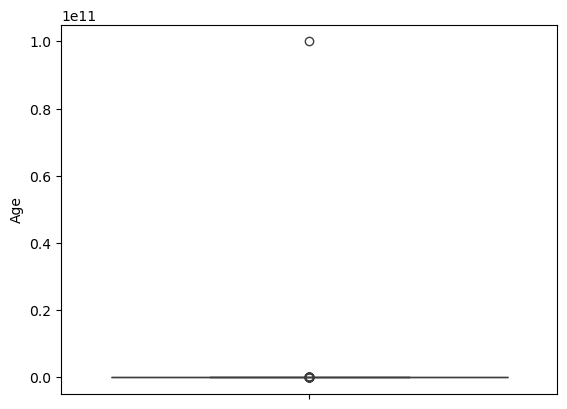

In [59]:
sns.boxplot(data['Age'])
plt.show()

In [61]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Display outliers
print(f"Outliers:\n{outliers}")


Outliers:
              Age  Gender self_employed family_history treatment  \
38             50    Male            No             No        No   
143           -29    Male            No             No        No   
294            56    Male            No             No       Yes   
297            60    Male            No             No        No   
347            54    Male            No            Yes       Yes   
364           329    Male            No             No       Yes   
372            55    Male            No            Yes       Yes   
390   99999999999   Other           Yes            Yes       Yes   
419            55    Male            No            Yes       Yes   
466            57    Male            No            Yes       Yes   
471            58    Male            No             No       Yes   
475            57    Male            No             No       Yes   
498            54    Male            No             No       Yes   
520            62    Male            N

In [63]:
# Remove outliers from Age column
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


In [65]:
#after removing the outliers
data.shape

(1219, 23)

In [67]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Data preprocessing

In [70]:
data['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [72]:
#Extracting the categorical columns from the dataframe
#Extracting the columns with object datatype as they are the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [74]:
categorical_columns

['Gender',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [76]:
# Define a function to get unique values for each column
def get_unique_values(df):
    for column in df.columns:
        print(f"Unique values in '{column}':")
        print(df[column].unique())
        print("\n")

# Call the function
get_unique_values(data)


Unique values in 'Age':
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 24 18 28 26 22 19
 25 45 21 43 48 20 47 49]


Unique values in 'Gender':
['Female' 'Male' 'Other']


Unique values in 'self_employed':
['No' 'Yes']


Unique values in 'family_history':
['No' 'Yes']


Unique values in 'treatment':
['Yes' 'No']


Unique values in 'work_interfere':
['Often' 'Rarely' 'Never' 'Sometimes']


Unique values in 'no_employees':
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


Unique values in 'remote_work':
['No' 'Yes']


Unique values in 'tech_company':
['Yes' 'No']


Unique values in 'benefits':
['Yes' "Don't know" 'No']


Unique values in 'care_options':
['Not sure' 'No' 'Yes']


Unique values in 'wellness_program':
['No' "Don't know" 'Yes']


Unique values in 'seek_help':
['Yes' "Don't know" 'No']


Unique values in 'anonymity':
['Yes' "Don't know" 'No']


Unique values in 'leave':
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']


U

In [78]:
data2= data.copy()

In [80]:
data2

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,Sometimes,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,No,Sometimes,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [82]:

one_hot_columns = [
    'Gender', 'self_employed', 'family_history', 'work_interfere', 
    'no_employees', 'remote_work', 'tech_company', 'benefits', 
    'care_options', 'wellness_program', 'seek_help', 'anonymity', 
    'leave', 'mental_health_consequence', 'phys_health_consequence', 
    'coworkers', 'supervisor', 'mental_health_interview', 
    'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
]

In [84]:
# LabelEncode the 'treatment' column separately
label_encoder = LabelEncoder()
data['treatment'] = label_encoder.fit_transform(data['treatment'])


In [86]:
# Define the OneHotEncoder for all other categorical columns
one_hot_encoder = OneHotEncoder()
one_hot_encoder


OneHotEncoder()

In [88]:
# ColumnTransformer to apply OneHotEncoder to the specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, one_hot_columns)
    ], remainder='drop'  # Keep the label encoded 'treatment' column
)

In [90]:
# Fit and transform the data
processed_data = preprocessor.fit_transform(data)
processed_data

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [92]:
# Get the names of the one-hot encoded columns
encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_columns)
encoded_columns

array(['Gender_Female', 'Gender_Male', 'Gender_Other', 'self_employed_No',
       'self_employed_Yes', 'family_history_No', 'family_history_Yes',
       'work_interfere_Never', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'no_employees_1-5', 'no_employees_100-500', 'no_employees_26-100',
       'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_No', 'remote_work_Yes',
       'tech_company_No', 'tech_company_Yes', "benefits_Don't know",
       'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes',
       "wellness_program_Don't know", 'wellness_program_No',
       'wellness_program_Yes', "seek_help_Don't know", 'seek_help_No',
       'seek_help_Yes', "anonymity_Don't know", 'anonymity_No',
       'anonymity_Yes', "leave_Don't know", 'leave_Somewhat difficult',
       'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy',
       'mental_hea

In [94]:
# Combine the names of the encoded columns and non-categorical columns
non_categorical_columns = ['Age', 'treatment']
all_columns = list(encoded_columns) + non_categorical_columns

In [96]:
# Fit and transform the data
encoded_data = preprocessor.fit_transform(data)

In [98]:
# Convert the one-hot encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_columns))

In [100]:
# Concatenate the encoded columns with Age and treatment
data1 = pd.concat([data2[['Age', 'treatment']].reset_index(drop=True), encoded_df], axis=1)

In [102]:
processed_data

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [104]:
#to check if any columns or rows are missed out
data1.shape, data.shape  

((1219, 66), (1219, 23))

In [106]:
#mapping the target variable to numerical value
data1["treatment"] = data1["treatment"].map({"No":0, "Yes":1})

In [108]:
data1['treatment'].value_counts()

treatment
1    614
0    605
Name: count, dtype: int64

In [110]:
#Create a DataFrame with the one-hot encoded columns
#get_feature_names_out() to get the column names for the encoded data
#one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(categorical_columns))

In [112]:
# Concatenate the original dataframe (without the categorical columns) with the one-hot encoded dataframe
#data = pd.concat([data.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

### Exploratory Data Analysis

In [115]:
data1.isna().sum().sum()

0

In [117]:
numerical_cols = data1.select_dtypes("number").columns
numerical_cols

Index(['Age', 'treatment', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'self_employed_No', 'self_employed_Yes', 'family_history_No',
       'family_history_Yes', 'work_interfere_Never', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes', 'no_employees_1-5',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000',
       'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_No',
       'remote_work_Yes', 'tech_company_No', 'tech_company_Yes',
       'benefits_Don't know', 'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes',
       'wellness_program_Don't know', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_Don't know', 'seek_help_No',
       'seek_help_Yes', 'anonymity_Don't know', 'anonymity_No',
       'anonymity_Yes', 'leave_Don't know', 'leave_Somewhat difficult',
       'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy',
     

In [119]:
data1.head()

,Age,treatment,Gender_Female,Gender_Male,Gender_Other,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,work_interfere_Never,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,44,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,31,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,31,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### Training Model

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [123]:
# Define X (features) and y (target)
y= data1['treatment']  # Target variable (the label-encoded 'treatment' column)
X = data1.drop("treatment", axis=1) # Predictor variables (all columns except 'treatment')

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [126]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(975, 65) (244, 65)
(975,) (244,)


In [129]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1214    1
1215    1
1216    1
1217    0
1218    1
Name: treatment, Length: 1219, dtype: int64

In [131]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost Classifier": xgb.XGBClassifier()
}

In [134]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function fits, predicts, and scores the models using accuracy score.
    It also captures feature importances for models that support it.
    """
   # making a dictionary to to keep model scores
    model_scores = {}
    
    # Looping through models
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)
        
        # Predictions
        training_predict = model.predict(X_train)
        testing_predict = model.predict(X_test)
        
        # Accuracy scores
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        
        # Store accuracy scores
        model_scores[name] = {
            "Training Accuracy": training_accuracy,
            "Testing Accuracy": testing_accuracy
        }
        
        # Capture feature importances if available
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            # Sorting feature importances for better readability
            sorted_importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
            model_scores[name]['Feature Importances'] = sorted_importances
    
    return model_scores


In [136]:
model_scores = fit_predict_and_score(models, X_train, X_test, y_train, y_test)

In [137]:
# Displaying the results
for model_name, results in model_scores.items():
    print(f"\n{model_name}:")
    print(f"Training Accuracy: {results['Training Accuracy']}")
    print(f"Testing Accuracy: {results['Testing Accuracy']}")
    
    if 'Feature Importances' in results:
        print(f"Top Features (sorted by importance): {results['Feature Importances'][:5]}")  # Display top 5 features



Logistic Regression:
Training Accuracy: 0.7692307692307693
Testing Accuracy: 0.7377049180327869

DecisionTree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.610655737704918
Top Features (sorted by importance): [('family_history_No', 0.1460211457625977), ('Age', 0.08603485410875066), ('work_interfere_Never', 0.06677284579554073), ('work_interfere_Often', 0.05350182961798069), ('care_options_Yes', 0.04575956994184054)]

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.7254098360655737
Top Features (sorted by importance): [('Age', 0.07497795097225671), ('family_history_Yes', 0.06304929668587794), ('work_interfere_Never', 0.05791527625428079), ('family_history_No', 0.05574131803692768), ('care_options_Yes', 0.03219832383299437)]

XGBoost Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.6885245901639344
Top Features (sorted by importance): [('work_interfere_Never', 0.08415096), ('family_history_No', 0.077910915), ('work_interfere_Often', 0.044253662), ('care_options_

In [138]:
# Fit your RandomForest model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store the feature names and their corresponding importance scores
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance (for better readability)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances (for checking)
print(importance_df)



                        Feature  Importance
0                           Age    0.074946
8          work_interfere_Never    0.060929
6             family_history_No    0.059034
7            family_history_Yes    0.058622
27             care_options_Yes    0.032281
..                          ...         ...
5             self_employed_Yes    0.007272
47  phys_health_consequence_Yes    0.004421
56  mental_health_interview_Yes    0.003253
3                  Gender_Other    0.003232
35                 anonymity_No    0.003103

[65 rows x 2 columns]


### To drop low importance feature

In [142]:
# Define the threshold for dropping low-importance features
threshold = 0.01

# Get the list of features with importance scores below the threshold
low_importance_features = [
    feature for feature, importance in zip(importance_df['Feature'], importance_df['Importance'])
    if importance < threshold
]

# Drop low-importance features from the dataset
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Print out the dropped features
print(f"Dropped features: {low_importance_features}")


Dropped features: ['leave_Very easy', 'coworkers_Yes', 'phys_health_consequence_Maybe', 'mental_health_consequence_Yes', 'obs_consequence_Yes', 'tech_company_Yes', 'no_employees_1-5', 'tech_company_No', 'wellness_program_Yes', 'seek_help_Yes', 'phys_health_interview_Yes', 'mental_health_interview_No', 'leave_Very difficult', "wellness_program_Don't know", 'self_employed_No', 'no_employees_500-1000', 'self_employed_Yes', 'phys_health_consequence_Yes', 'mental_health_interview_Yes', 'Gender_Other', 'anonymity_No']


### ACCESSING THE REMAINING FEATURES

In [146]:
# Get the list of remaining features after dropping low-importance ones
remaining_features = X_train_reduced.columns

# Convert to a list (optional)
remaining_features_list = list(remaining_features)

# Print the remaining important features
print(f"Remaining important features: {remaining_features_list}")


Remaining important features: ['Age', 'Gender_Female', 'Gender_Male', 'family_history_No', 'family_history_Yes', 'work_interfere_Never', 'work_interfere_Often', 'work_interfere_Rarely', 'work_interfere_Sometimes', 'no_employees_100-500', 'no_employees_26-100', 'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_No', 'remote_work_Yes', "benefits_Don't know", 'benefits_No', 'benefits_Yes', 'care_options_No', 'care_options_Not sure', 'care_options_Yes', 'wellness_program_No', "seek_help_Don't know", 'seek_help_No', "anonymity_Don't know", 'anonymity_Yes', "leave_Don't know", 'leave_Somewhat difficult', 'leave_Somewhat easy', 'mental_health_consequence_Maybe', 'mental_health_consequence_No', 'phys_health_consequence_No', 'coworkers_No', 'coworkers_Some of them', 'supervisor_No', 'supervisor_Some of them', 'supervisor_Yes', 'mental_health_interview_Maybe', 'phys_health_interview_Maybe', 'phys_health_interview_No', "mental_vs_physical_Don't know", 'mental_vs_physical_No', 'menta

In [148]:
data1.columns

Index(['Age', 'treatment', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'self_employed_No', 'self_employed_Yes', 'family_history_No',
       'family_history_Yes', 'work_interfere_Never', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes', 'no_employees_1-5',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000',
       'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_No',
       'remote_work_Yes', 'tech_company_No', 'tech_company_Yes',
       'benefits_Don't know', 'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes',
       'wellness_program_Don't know', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_Don't know', 'seek_help_No',
       'seek_help_Yes', 'anonymity_Don't know', 'anonymity_No',
       'anonymity_Yes', 'leave_Don't know', 'leave_Somewhat difficult',
       'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy',
     

In [150]:
## Since we have the important features, i will train te data with te important features, and do one hot encoding

In [152]:
# Final Columns to be dropped
# step 1:assigning a variable to the columns that needs to be dropped
dropped_columns2=['leave','coworkers','phys_health_consequence','mental_health_consequence','obs_consequence','tech_company','no_employees','wellness_program','seek_help','phys_health_interview','mental_health_interview','self_employed','anonymity' ]
dropped_columns2

['leave',
 'coworkers',
 'phys_health_consequence',
 'mental_health_consequence',
 'obs_consequence',
 'tech_company',
 'no_employees',
 'wellness_program',
 'seek_help',
 'phys_health_interview',
 'mental_health_interview',
 'self_employed',
 'anonymity']

In [154]:
#step 2: dropping the columns
data2.drop(columns=dropped_columns2, inplace=True)

In [156]:
data2.shape

(1219, 10)

In [158]:
data2.columns

Index(['Age', 'Gender', 'family_history', 'treatment', 'work_interfere',
       'remote_work', 'benefits', 'care_options', 'supervisor',
       'mental_vs_physical'],
      dtype='object')

In [160]:
data2.dtypes

Age                    int64
Gender                object
family_history        object
treatment             object
work_interfere        object
remote_work           object
benefits              object
care_options          object
supervisor            object
mental_vs_physical    object
dtype: object

In [162]:
data2.shape

(1219, 10)

In [164]:
one_hot_columns1 = [ 'Gender', 'family_history', 'work_interfere', 
                    'remote_work', 'benefits', 'care_options',
                      'supervisor','mental_vs_physical']


In [166]:
# LabelEncode the 'treatment' column separately
label_encoder = LabelEncoder()
data2['treatment'] = label_encoder.fit_transform(data2['treatment'])

In [168]:
data2.head(2)

,Age,Gender,family_history,treatment,work_interfere,remote_work,benefits,care_options,supervisor,mental_vs_physical
0,37,Female,No,1,Often,No,Yes,Not sure,Yes,Yes
1,44,Male,No,0,Rarely,No,Don't know,No,No,Don't know


In [170]:
# Define the OneHotEncoder for all other categorical columns
one_hot_encoder = OneHotEncoder()

In [172]:
# ColumnTransformer to apply OneHotEncoder to the specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, one_hot_columns1)
    ], remainder='drop'
)

In [174]:
# Fit and transform the data
encoded_data = preprocessor.fit_transform(data2)

In [176]:
# Convert the one-hot encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_columns1))

In [178]:
# Concatenate the encoded columns with Age and treatment
data2 = pd.concat([data2[['Age', 'treatment']].reset_index(drop=True), encoded_df], axis=1)

In [180]:
data2.head()

,Age,treatment,Gender_Female,Gender_Male,Gender_Other,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,...,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
0,37,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,44,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,32,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,31,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [182]:
processed_data

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [184]:

data2.columns

Index(['Age', 'treatment', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'family_history_No', 'family_history_Yes', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'remote_work_No', 'remote_work_Yes',
       'benefits_Don't know', 'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes', 'supervisor_No',
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_vs_physical_Don't know', 'mental_vs_physical_No',
       'mental_vs_physical_Yes'],
      dtype='object')

In [186]:
data2.shape

(1219, 25)

## TRAINING THE DATA WITH THE UPDATED AND IMPORTANT FEATURES

In [189]:
#splitting te dataset

In [191]:
# Define X (features) and y (target)
y= data2['treatment']  # Target variable (the label-encoded 'treatment' column)
X = data2.drop("treatment", axis=1) # Predictor variables (all columns except 'treatment')

In [193]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1214    1
1215    1
1216    1
1217    0
1218    1
Name: treatment, Length: 1219, dtype: int32

In [195]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [197]:
# Check the shapes of the resulting splits
print(f"Training data shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing data shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training data shape: X_train = (975, 24), y_train = (975,)
Testing data shape: X_test = (244, 24), y_test = (244,)


In [199]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost Classifier": xgb.XGBClassifier()
}

In [201]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, X_test, y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(X_test)
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores
        

In [203]:
fit_predict_and_score(models, X_train, X_test, y_train, y_test)

{'Logistic Regression': ' has a  score of 0.76 on training set and a score of 0.7418032786885246 on testing set',
 'DecisionTree Classifier': ' has a  score of 0.9876923076923076 on training set and a score of 0.6065573770491803 on testing set',
 'Random Forest': ' has a  score of 0.9876923076923076 on training set and a score of 0.7008196721311475 on testing set',
 'XGBoost Classifier': ' has a  score of 0.9774358974358974 on training set and a score of 0.680327868852459 on testing set'}

In [204]:
data.shape

(1219, 23)

### Hyper Parameter Tuning

In [208]:
from sklearn.model_selection import GridSearchCV

In [210]:
# Hyperparameter tuning for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best parameters for RandomForest: {rf_grid.best_params_}")
print(f"Best score for RandomForest: {rf_grid.best_score_}")

Best parameters for RandomForest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best score for RandomForest: 0.7579487179487181


#### USING THE BEST PARAMETER

In [212]:
# Instantiate the model with the best parameters
best_rf = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=100)

In [213]:
# Train the model with training data
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5)

In [214]:
# Predict on test data
y_pred = best_rf.predict(X_test)

## Evaluating the Model Performance

In [216]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [217]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

In [218]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7213114754098361
Precision: 0.7593984962406015
Recall: 0.7372262773722628
F1 Score: 0.7481481481481481


In [219]:
X_test

,Age,Gender_Female,Gender_Male,Gender_Other,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
542,33,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
259,27,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
43,30,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1009,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
753,32,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,43,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
243,40,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
59,44,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1074,30,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [257]:
X_test.columns

Index(['Age', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'family_history_No', 'family_history_Yes', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'remote_work_No', 'remote_work_Yes',
       'benefits_Don't know', 'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes', 'supervisor_No',
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_vs_physical_Don't know', 'mental_vs_physical_No',
       'mental_vs_physical_Yes'],
      dtype='object')

Since i am working on a mental health prediction, i will focus more on recall(True positive Rate) I need to ensure that my model correctly identifies the maximum number of people who actually need treatment (true positives. I do not want to miss out on individuals who truly needs help

#### Note: 
- high recall ensures that more people who need treatment get identified.

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),  # change to 'micro' or 'macro' for multi-class
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Use GridSearchCV with multiple scoring metrics
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring=scoring, refit='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Get the best parameters for the chosen metric (F1 in this case)
print(f"Best parameters based on F1 score: {rf_grid.best_params_}")
print(f"Best F1 score: {rf_grid.best_score_}")

# To view scores for all metrics
print("Grid scores for each metric:")
results = rf_grid.cv_results_
for scorer in scoring.keys():
    print(f"Best {scorer}: {results['mean_test_' + scorer][rf_grid.best_index_]}")

# Use the best estimator to make predictions on the test set
y_pred = rf_grid.best_estimator_.predict(X_test)


Best parameters based on F1 score: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best F1 score: 0.7504068913500853
Grid scores for each metric:
Best accuracy: 0.757948717948718
Best precision: 0.7572567783094099
Best recall: 0.7442348008385743
Best f1: 0.7504068913500853


### STREAMLIT DEPLOYMENT

In [233]:
import pickle

In [234]:
filename = "Mental_Health.sav"
pickle.dump(rf_grid, open(filename, "wb"))

In [235]:
# loading the saved model
loaded_model = pickle.load(open("Mental_Health.sav", "rb"))

In [240]:
X_test.head(2)

,Age,Gender_Female,Gender_Male,Gender_Other,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
542,33,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
259,27,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [242]:
rf_grid

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', average=binary),
                      'precision': make_scorer(precision_score, response_method='predict', average=binary),
                      'recall': make_scorer(recall_score, response_method='predict', average=binary)})

In [244]:
X_test.columns

Index(['Age', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'family_history_No', 'family_history_Yes', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'remote_work_No', 'remote_work_Yes',
       'benefits_Don't know', 'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes', 'supervisor_No',
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_vs_physical_Don't know', 'mental_vs_physical_No',
       'mental_vs_physical_Yes'],
      dtype='object')

In [246]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [248]:
X_test.iloc[0].tolist()

[33.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [251]:
input_data = ([33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0])

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rf_grid.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Unlikely to seek mental health treatment")
else:
    print("Likely to seek mental health treatment")

Unlikely to seek mental health treatment


## Saving the base line model using Pickle
- In Python, the pickle module is used for serializing and deserializing objects. Serialization is the process of converting a Python object into a byte stream, and deserialization is the reverse process of reconstructing the Python object from the byte stream.

In [254]:
# Save as .pkl
with open('Mental_health_prediction.pkl', 'wb') as file:
    pickle.dump(rf_grid, file)